In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [20]:
# Load data from file
file_name = "./data/ep_rew_mean.csv"
# file_name = "./data/ep_len_mean.csv"
data = pd.read_csv(file_name)

# Prepear data to process
X = data["Step"].values.reshape(-1, 1)  # 2D-Array für scikit-learn
y = data["Value"].values

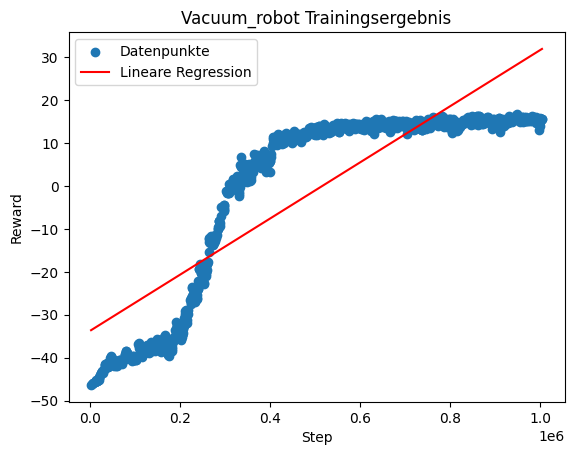

In [21]:
# Show scatter plot with linear regression
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, label="Datenpunkte")

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)


plt.plot(x_range, y_pred, color="red", label="Lineare Regression")
plt.title('Vacuum_robot Trainingsergebnis')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.legend()
plt.show()

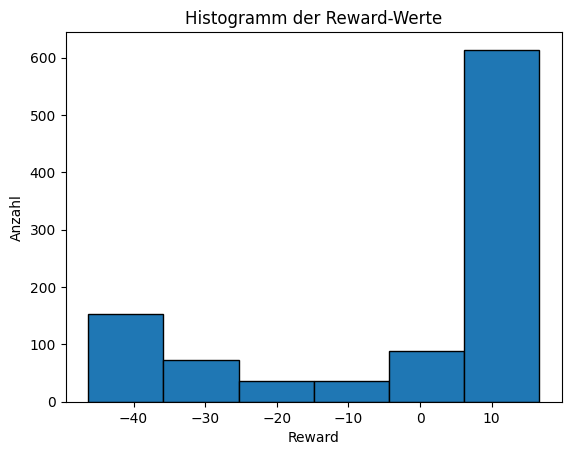

In [22]:
# Show the distribution via histogramm plot
plt.hist(y, bins=6, edgecolor='black')
plt.title('Histogramm der Reward-Werte')
plt.xlabel('Reward')
plt.ylabel('Anzahl')
plt.show()

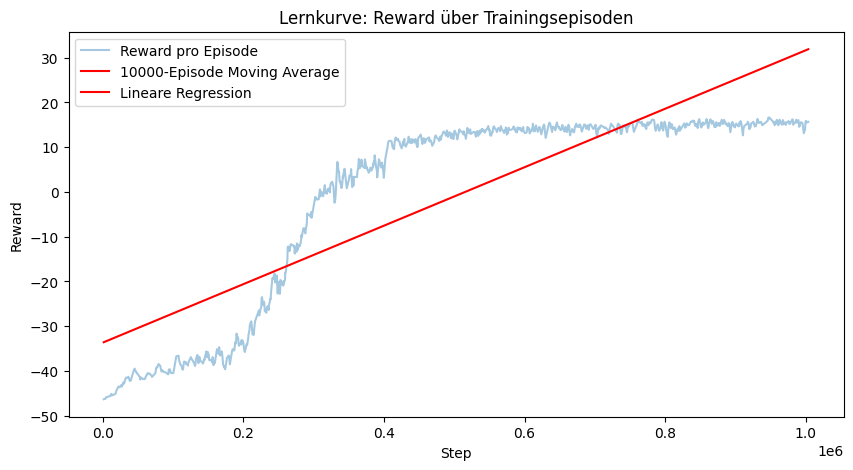

In [23]:
# Berechne den gleitenden Mittelwert über z.B. 10 Episoden
window_size = 10000
data['Reward_MA'] = data['Value'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 5))
plt.plot(data['Step'], data['Value'], alpha=0.4, label='Reward pro Episode')
plt.plot(data['Step'], data['Reward_MA'], color='red', label=f'{window_size}-Episode Moving Average')
plt.plot(x_range, y_pred, color="red", label="Lineare Regression")
plt.title('Lernkurve: Reward über Trainingsepisoden')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.legend()
plt.show()

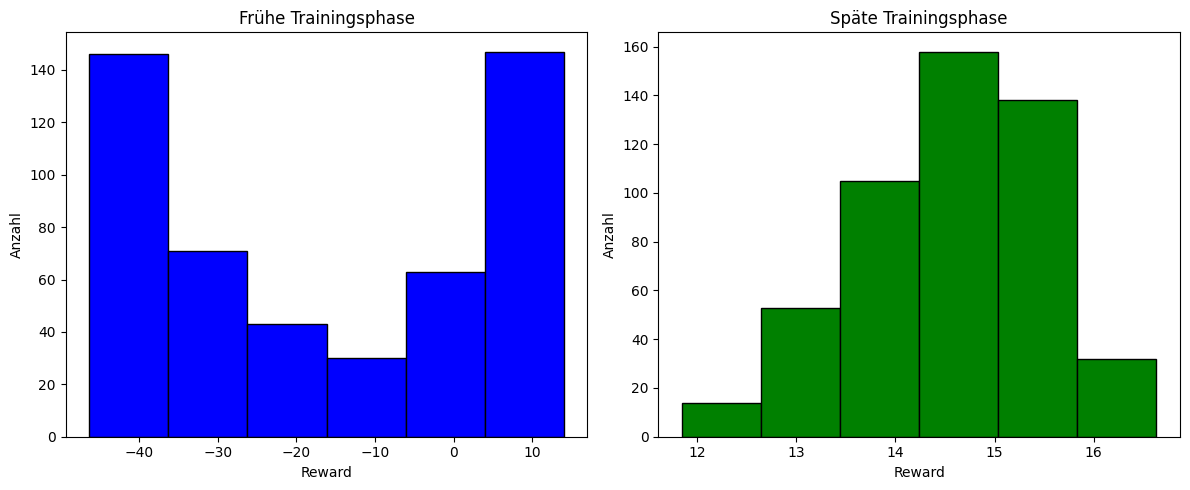

In [24]:
# Unterteile die Daten in zwei Abschnitte: z.B. Hälfte früh, Hälfte spät
mid_index = int(len(data) / 2)
early_rewards = data['Value'][:mid_index]
late_rewards = data['Value'][mid_index:]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(early_rewards, bins=6, edgecolor='black', color='blue')
plt.title('Frühe Trainingsphase')
plt.xlabel('Reward')
plt.ylabel('Anzahl')

plt.subplot(1, 2, 2)
plt.hist(late_rewards, bins=6, edgecolor='black', color='green')
plt.title('Späte Trainingsphase')
plt.xlabel('Reward')
plt.ylabel('Anzahl')

plt.tight_layout()
plt.show()

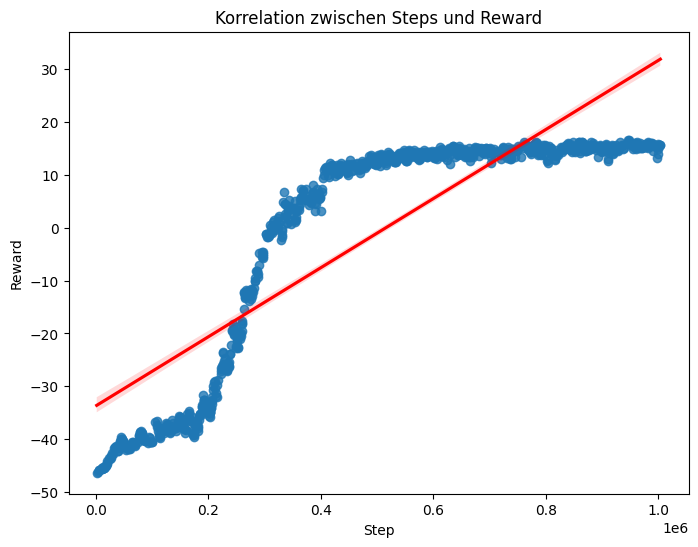

In [25]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Step', y='Value', data=data, ci=95, line_kws={"color": "red"})
plt.title('Korrelation zwischen Steps und Reward')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.show()

In [26]:
# Ensure X and y are 1D arrays for np.corrcoef
correlation = np.corrcoef(X.flatten(), y)[0, 1]
print("Korrelationskoeffizient:", correlation)

Korrelationskoeffizient: 0.8608245958061201


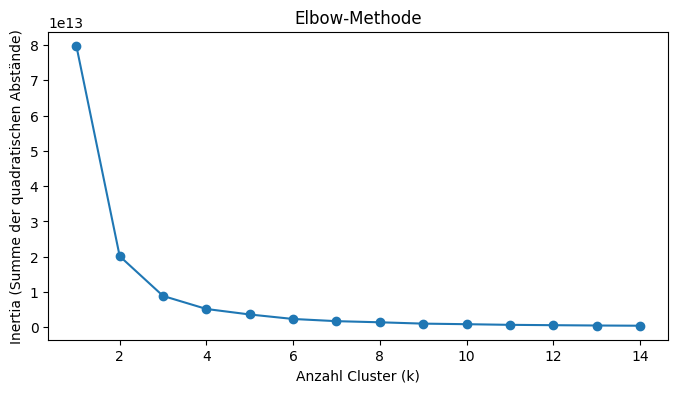

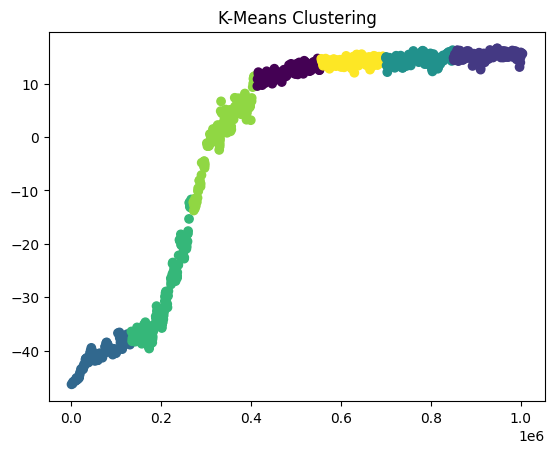

In [27]:
from sklearn.cluster import KMeans 

x = data[['Step', 'Value']].values

inertias = []
cluster_range = range(1, 15)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Inertia (Summe der quadratischen Abstände)')
plt.title('Elbow-Methode')
plt.show()

kmeans = KMeans(n_clusters=7, random_state=42) 
kmeans.fit(x) 

plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_) 
plt.title("K-Means Clustering") 
plt.show() 